In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics

import seaborn as sns

In [2]:
base = pd.read_csv('../../Data/BaseData.csv')

In [3]:
X = base.drop(['SalePrice'], axis=1).values
y = base.SalePrice.values

In [4]:
len(y)

2580

In [5]:
X.shape

(2580, 298)

In [6]:
X.shape[1]

298

In [7]:
AR2_Base = []
MAE_Base = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    elastic = ElasticNet(alpha=1, l1_ratio=0.5)
    elastic.fit(X_train_scaled,Y_train)
    
    pred = elastic.predict(X_test_scaled)
    
    Elastic_Score = elastic.score(X_test_scaled, Y_test)
    
    Adj_r2 = 1 - (1-Elastic_Score) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AR2_Base.append(Adj_r2)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_Base.append(mae)




In [8]:
Base = pd.DataFrame({'AR2_Base': AR2_Base, 'MAE_Base': MAE_Base})
Base

,AR2_Base,MAE_Base
0,0.895387,13878.331494
1,0.867280,15229.696559
2,0.890890,15516.600877
3,0.889281,15456.614529
4,0.879864,16422.039642
5,0.898033,14992.559173
6,0.898318,14389.471299
7,0.877913,15018.064802
8,0.867626,16176.196805
9,0.847957,16268.419025


In [9]:
base_drop1 = pd.read_csv('BaseDrop1.csv')

In [10]:
base_drop1.shape

(2579, 300)

In [11]:
X2 = base_drop1.drop(['SalePrice'], axis=1).values
y2 = base_drop1.SalePrice.values

In [12]:
len(y2)

2579

In [13]:
X2.shape

(2579, 299)

In [14]:
X2.shape[1]

299

In [15]:
AR2_Drop1 = []
MAE_Drop1 = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X2,y2,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    elastic = ElasticNet(alpha=1, l1_ratio=0.5)
    elastic.fit(X_train_scaled,Y_train)
    
    pred = elastic.predict(X_test_scaled)
    
    Elastic_Score = elastic.score(X_test_scaled, Y_test)
    
    Adj_r2 = 1 - (1-Elastic_Score) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AR2_Drop1.append(Adj_r2)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_Drop1.append(mae)


In [16]:
BaseDrop1 = pd.DataFrame({'AR2_Drop1': AR2_Drop1, 'MAE_Drop1': MAE_Drop1})
BaseDrop1

,AR2_Drop1,MAE_Drop1
0,0.893326,14282.112205
1,0.879806,15463.283132
2,0.889736,15596.179411
3,0.889139,15102.082389
4,0.906175,13739.342882
5,0.884581,14894.968603
6,0.885903,15342.136689
7,0.898935,15072.061313
8,0.902597,14487.069340
9,0.872708,15231.075352


In [17]:
base_drop_IF = pd.read_csv('BaseDropIF.csv')

In [18]:
base_drop_IF.shape

(2567, 299)

In [19]:
X3 = base_drop_IF.drop(['SalePrice'], axis=1).values
y3 = base_drop_IF.SalePrice.values

In [20]:
AR2_DropIF = []
MAE_DropIF = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X3,y3,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    elastic = ElasticNet(alpha=1, l1_ratio=0.5)
    elastic.fit(X_train_scaled,Y_train)
    
    pred = elastic.predict(X_test_scaled)
    
    Elastic_Score = elastic.score(X_test_scaled, Y_test)
    
    Adj_r2 = 1 - (1-Elastic_Score) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AR2_DropIF.append(Adj_r2)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_DropIF.append(mae)




In [21]:
BaseDropIF = pd.DataFrame({'AR2_DropIF': AR2_DropIF, 'MAE_DropIF': MAE_DropIF})
BaseDropIF

,AR2_DropIF,MAE_DropIF
0,0.904587,14030.649298
1,0.882015,15269.633708
2,0.909576,14671.454547
3,0.879569,15316.889874
4,0.891657,15016.864509
5,0.882466,14869.979555
6,0.886138,15382.879926
7,0.889399,15218.545435
8,0.903501,14283.558579
9,0.899979,14258.864744


In [22]:
box = pd.concat([Base, BaseDrop1, BaseDropIF], axis=1)
box

,AR2_Base,MAE_Base,AR2_Drop1,MAE_Drop1,AR2_DropIF,MAE_DropIF
0,0.895387,13878.331494,0.893326,14282.112205,0.904587,14030.649298
1,0.867280,15229.696559,0.879806,15463.283132,0.882015,15269.633708
2,0.890890,15516.600877,0.889736,15596.179411,0.909576,14671.454547
3,0.889281,15456.614529,0.889139,15102.082389,0.879569,15316.889874
4,0.879864,16422.039642,0.906175,13739.342882,0.891657,15016.864509
5,0.898033,14992.559173,0.884581,14894.968603,0.882466,14869.979555
6,0.898318,14389.471299,0.885903,15342.136689,0.886138,15382.879926
7,0.877913,15018.064802,0.898935,15072.061313,0.889399,15218.545435
8,0.867626,16176.196805,0.902597,14487.069340,0.903501,14283.558579
9,0.847957,16268.419025,0.872708,15231.075352,0.899979,14258.864744


In [23]:
box.describe()

,AR2_Base,MAE_Base,AR2_Drop1,MAE_Drop1,AR2_DropIF,MAE_DropIF
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.876500,15420.365802,0.888971,15126.316669,0.891682,15027.485218
std,0.019603,708.310544,0.011300,614.682748,0.010764,592.893605
min,0.823252,13878.331494,0.853229,13516.425571,0.858994,13470.931938
25%,0.867356,14963.964258,0.880739,14677.481663,0.885678,14642.307319
50%,0.882119,15359.746326,0.888502,15141.785919,0.892145,15026.281901
75%,0.890188,15843.770598,0.895607,15597.405744,0.897090,15382.844878
max,0.919381,17214.021077,0.917355,16340.960594,0.918446,16613.419816


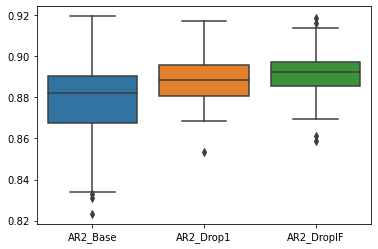

In [24]:
sns.boxplot(data=box[['AR2_Base','AR2_Drop1', 'AR2_DropIF']]);

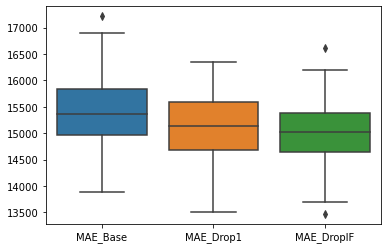

In [25]:
sns.boxplot(data=box[['MAE_Base', 'MAE_Drop1', 'MAE_DropIF']]);